In [23]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import classificationSummary
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
from dmba import gainsChart,liftChart

# 앙상블

여러 지도학습 기반의 모델들을 하나의 '슈퍼모델'로 결합해 위험 부담을 줄이기 위해 사용하는 방법

그러므로 단일 예측 모델을 선택하는 것보다, 여러 모델을 결합하는 것이 정확도가 상승함

= 서로 다른 조합의 예측변수를 사용하는 세 가지 선형회귀모형

단점은, 약간이라도 오용하면 과적합 발생할 수 있음.
 
+일반적으로, 부스팅은 배깅보다 더 높은 성능을 낸다고 알려져있다. 

In [2]:
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
train_lr=pd.read_csv("Train_lr.csv")
train_dt=pd.read_csv("Train_dt.csv")

In [21]:
train_df

,inst_id,OC,sido_choongchung,sido_gangwon,sido_gyeongin,sido_gyeongsang,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.222130,0.000000,20.099863,19.781657,21.686169,20.963246,4.143135,4.174387,0.0,3.0
1,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,18.841626,9.180719,18.812726,17.568559,18.838180,12.258481,6.687109,6.701960,0.0,4.0
2,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.459586,0.693147,0.0,4.0
3,7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,23.557572,22.944579,23.755157,23.437961,23.284691,22.769775,6.498282,6.498282,0.0,4.0
4,9,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,24.126880,23.590810,23.784786,23.370010,15.531458,22.923325,5.332719,5.288267,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,21.685753,0.000000,22.641007,22.503290,22.405862,20.514569,5.267858,4.955827,0.0,3.0
297,423,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.382027,4.382027,0.0,3.2
298,426,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,21.498441,0.000000,22.158142,21.639056,21.904736,0.000000,3.860891,3.905642,0.0,2.6
299,427,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,22.579564,0.000000,0.000000,0.000000,0.000000,0.000000,4.615121,5.580909,0.0,3.0


In [3]:
# enables=train_df[두개]

In [4]:
#학습, 검증 세트 분할
X = train_df.drop('OC',axis=1)
y = train_df['OC']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=3)

single tree

In [5]:
defaultTree = DecisionTreeClassifier(random_state=1)
defaultTree.fit(X_train, y_train)

classes = defaultTree.classes_
classificationSummary(y_valid, defaultTree.predict(X_valid), class_names=defaultTree.classes_)

Confusion Matrix (Accuracy 0.9256)

       Prediction
Actual   0   1
     0   1   2
     1   7 111


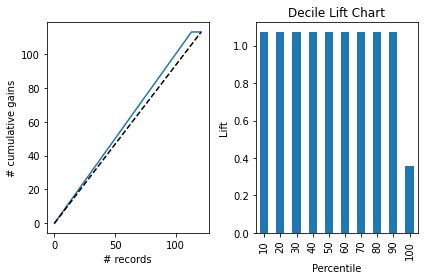

In [6]:
pred_v1=pd.Series(defaultTree.predict(X_valid))
pred_v1=pred_v1.sort_values(ascending=False)

fig,axes=plt.subplots(nrows=1,ncols=2)
ax=gainsChart(pred_v1,ax=axes[0])

ax=liftChart(pred_v1,ax=axes[1],labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

bagging

In [8]:
#분류나무로 배깅 실행
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), 
                            n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)

classificationSummary(y_valid, bagging.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.9752)

       Prediction
Actual   0   1
     0   0   3
     1   0 118


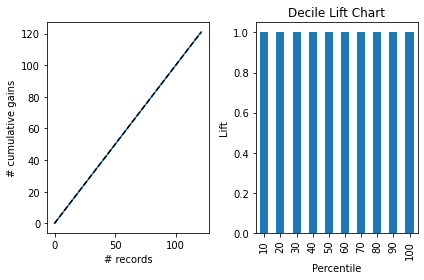

In [9]:
pred_v2=pd.Series(bagging.predict(X_valid))
pred_v2=pred_v2.sort_values(ascending=False)

fig,axes=plt.subplots(nrows=1,ncols=2)
ax=gainsChart(pred_v2,ax=axes[0])

ax=liftChart(pred_v2,ax=axes[1],labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

boosting

In [11]:
#분류나무로 부스팅 실행
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                   n_estimators=100, random_state=1)

In [12]:
classificationSummary(y_valid, boost.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.9008)

       Prediction
Actual   0   1
     0   1   2
     1  10 108


In [13]:
#디폴트 개수(n_estimators=100)의 약한 학습기만 남겨두고 다시 실행
boost2=AdaBoostClassifier(DecisionTreeClassifier(random_state=1,max_depth=1,min_samples_split=6),n_estimators=100,random_state=1)
boost2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         min_samples_split=6,
                                                         random_state=1),
                   n_estimators=100, random_state=1)

In [14]:
classificationSummary(y_valid, boost2.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.9504)

       Prediction
Actual   0   1
     0   1   2
     1   4 114


In [15]:
accuracy_score(y_valid,boost.predict(X_valid))

0.9008264462809917

In [16]:
accuracy_score(y_valid,boost2.predict(X_valid))

0.9504132231404959

정확도가 상승함 !! 

(0.1의 오류율을 포함해서 식별하다가 0.05의 오류율을 포함해서 식별함)

그러나 분류나무로 배깅한 것 보다는, 분류나무로 배스팅 한게 더 정확도는 높음

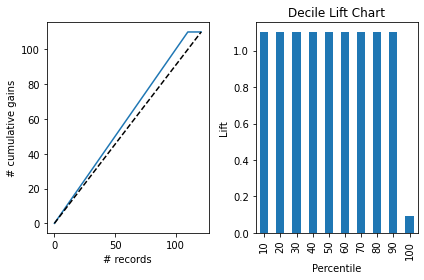

In [17]:
pred_v3=pd.Series(boost.predict(X_valid))
pred_v3=pred_v3.sort_values(ascending=False)

fig,axes=plt.subplots(nrows=1,ncols=2)
ax=gainsChart(pred_v3,ax=axes[0])

ax=liftChart(pred_v3,ax=axes[1],labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

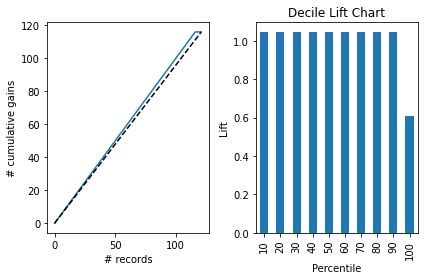

In [18]:
pred_v4=pd.Series(boost2.predict(X_valid))
pred_v4=pred_v4.sort_values(ascending=False)

fig,axes=plt.subplots(nrows=1,ncols=2)
ax=gainsChart(pred_v4,ax=axes[0])

ax=liftChart(pred_v4,ax=axes[1],labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

In [ ]:
rfModel = RandomForestClassifier(n_estimators=100, random_state=1)
rfModel.fit(X_train, y_train)

classificationSummary(y_valid, rfModel.predict(X_valid), class_names=classes)

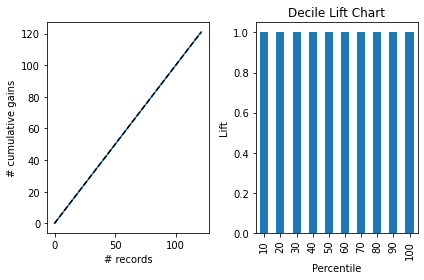

In [20]:
pred_v5=pd.Series(rfModel.predict(X_valid))
pred_v5=pred_v5.sort_values(ascending=False)

fig,axes=plt.subplots(nrows=1,ncols=2)
ax=gainsChart(pred_v5,ax=axes[0])

ax=liftChart(pred_v5,ax=axes[1],labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

정확도의 측면에서는, 랜덤포레스트가 짱(근데 이건 앙상블 안한거)

십분위 수의 측면에서는 배깅과 랜덤포레스트, 부스팅 두개가 비슷한 양상을 보임

각 등급에 얼마나 분포하고 있는지를 나타내는 값들을 계산해 누적으로 연결한 도표


In [25]:
test_df

,inst_id,OC,sido_choongchung,sido_gyeongin,sido_gyeongsang,sido_jeju,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
0,2,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,24.648885,24.338050,22.275075,22.268698,23.501178,22.914314,6.542472,6.542472,0.0,3.0
1,5,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,24.463273,23.909618,23.950510,23.630167,22.055404,0.000000,5.940171,5.918894,0.0,2.0
2,6,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,24.047434,23.806220,0.000000,0.000000,0.000000,23.519657,5.285888,5.225619,0.2,3.0
3,8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,22.980460,22.170624,21.662855,0.000000,24.390483,0.000000,6.634633,6.634633,0.0,4.0
4,10,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,22.742900,21.916712,24.318498,23.784183,23.971502,23.436150,6.082219,5.955837,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,23.279082,0.000000,21.735002,0.000000,23.351521,0.000000,6.329721,4.949613,0.0,3.0
123,425,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.042985,0.000000,21.310989,21.277151,22.872059,22.688514,4.890349,4.927254,0.0,3.2
124,429,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.588876,4.544446,0.0,3.0
125,430,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.861674,0.000000,24.080792,23.967076,22.205786,0.000000,5.897154,5.840642,0.0,3.2


In [27]:
X1 = test_df.drop('OC',axis=1)
y1 = test_df['OC']
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.40, random_state=3)

In [28]:
defaultTree = DecisionTreeClassifier(random_state=1)
defaultTree.fit(X1_train, y1_train)

classes = defaultTree.classes_
classificationSummary(y1_valid, defaultTree.predict(X1_valid), class_names=defaultTree.classes_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').